In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Clean import *

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [3]:
RUOA = "../../Datasets/"
DOWNTOWN = "../AltenativeDatasets/Datasets/"

In [4]:
df_ruoa = pd.read_csv(RUOA + "Day.csv")
df_downtown = pd.read_csv(DOWNTOWN + "CompleteDataset.csv")

In [5]:
df_ruoa["Time"] = pd.to_datetime(df_ruoa["Time"])
df_downtown["Fecha"] = pd.to_datetime(df_downtown["Fecha"])

In [6]:
print(f"RUOA: {df_ruoa.Time.min()}, {df_ruoa.Time.max()}")

RUOA: 2015-08-01 00:00:00, 2025-01-27 00:00:00


In [7]:
df_downtown = df_downtown.rename({"Fecha":"Time", 
                    "Temperatura": "TemperatureDowntown",
                    "RelativeHumidity": "RelativeHumidityDowntown",
                    "SolarRadiation": "SolarRadiationDowntown",
                    "Rainfall":"RainfallDowntown",
                    "WindDirection": "WindDirectionDowntown",
                    "PM10": "PM10Downtown",
                    "PM2.5": "PM2.5Downtown",
                    "O3": "O3Downtown",
                    "CO": "CODowntown",
                    "NO": "NODowntown",
                    "NO2": "NO2Downtown",
                    "SO2": "SO2Downtown",
                    }, axis=1)

In [8]:
df_downtown.columns

Index(['Time', 'TemperatureDowntown', 'RelativeHumidityDowntown',
       'SolarRadiationDowntown', 'RainfallDowntown', 'WindDirectionDowntown',
       'PM10Downtown', 'PM2.5Downtown', 'O3Downtown', 'CODowntown',
       'NODowntown', 'NO2Downtown', 'SO2Downtown'],
      dtype='object')

In [9]:
df_merge = pd.merge(df_ruoa, df_downtown, how="outer", on=["Time", "Time"]).drop_duplicates()
df_merge

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,TemperatureDowntown,RelativeHumidityDowntown,SolarRadiationDowntown,RainfallDowntown,WindDirectionDowntown,PM10Downtown,PM2.5Downtown,O3Downtown,CODowntown,NODowntown,NO2Downtown,SO2Downtown
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,2025-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.816667,31.000000,0.0,0.0,194.0,-14.0,21.625000,0.0,NaN,0.0,0.0,0.0
3505,2025-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.087500,29.666667,0.0,0.0,223.0,-14.0,19.250000,0.0,NaN,0.0,0.0,0.0
3506,2025-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.862500,31.500000,0.0,0.0,209.0,-14.0,18.250000,0.0,NaN,0.0,0.0,0.0
3507,2025-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.237500,33.458333,0.0,0.0,145.0,-14.0,20.833333,0.0,NaN,0.0,0.0,0.0


In [10]:
df_merge.describe()

,Time,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,TemperatureDowntown,RelativeHumidityDowntown,SolarRadiationDowntown,RainfallDowntown,WindDirectionDowntown,PM10Downtown,PM2.5Downtown,O3Downtown,CODowntown,NODowntown,NO2Downtown,SO2Downtown
count,3509,3213.000000,3453.000000,3265.000000,1895.000000,2477.000000,1579.000000,1579.000000,2859.000000,2711.000000,1284.000000,3242.000000,3265.000000,3223.000000,2594.000000,3234.000000,3265.000000,2341.000000,2341.000000,2340.000000,1399.000000,2341.000000,1551.000000,2117.000000,1568.000000,1603.000000,1352.000000,1383.000000,927.000000
mean,2020-05-20 00:00:00.000000256,51.436975,1.959340,10.665736,33.354013,0.990740,4.227807,3.758169,70.587017,22.794050,14.170789,17.600482,61.178079,1.673802,11.765433,806.040141,240.496423,19.527246,53.747995,299.940690,84.700071,139.868005,-1.085457,44.482433,21.136951,0.464167,4.716587,5.830501,2.582873
min,2015-08-01 00:00:00,0.000000,0.000000,0.000000,-267.601807,-1.813816,-120.076174,-0.961910,-0.524556,-200.212489,-1139.584226,7.102895,0.408878,0.000000,0.134989,798.316667,-2.198284,8.590000,15.416667,0.000000,0.000000,0.000000,-14.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-12-25 00:00:00,0.000000,0.000000,8.998400,26.668128,0.429083,1.328547,0.269552,0.276049,14.620674,9.815000,15.833456,49.597813,1.289398,1.623084,805.011197,204.516944,18.104167,42.500000,206.272436,0.000000,27.000000,0.000000,12.791667,4.400000,0.093750,0.000000,0.000000,0.000000
50%,2020-05-20 00:00:00,0.000000,0.000000,10.553423,32.956792,0.757382,3.599172,0.629285,0.331306,21.036472,14.164580,17.731101,64.785764,1.614880,2.054560,806.087735,242.101720,19.545833,56.782609,285.094551,0.110000,179.000000,0.000000,19.000000,22.541667,0.353750,3.408333,0.000000,0.000000
75%,2022-10-14 00:00:00,132.000000,0.600000,12.880680,39.665399,1.102632,5.209348,1.291760,0.409358,30.054105,21.031064,19.252424,74.459132,1.968314,2.542569,807.134410,285.092285,21.066667,65.541667,443.157051,1.025000,215.000000,0.000000,26.200000,32.166667,0.627446,7.541667,9.104167,0.000000
max,2025-03-09 00:00:00,354.000000,53.900000,17.982586,181.718000,69.114637,4339.367757,3001.913930,44190.105071,171.763035,80.472833,32.322439,98.498681,6.135453,1000.000000,811.697917,555.670708,26.829167,88.375000,652.000000,431.980000,359.000000,235.500000,985.291667,133.750000,8.640000,199.214286,376.714286,71.666667
std,NaN,80.200796,5.383117,3.010377,13.421609,2.344432,109.965022,78.661290,1658.396488,12.337863,38.637073,2.691010,16.665208,0.541766,96.299514,1.561117,62.606044,2.495301,14.508262,167.254459,165.600423,92.208103,8.702051,135.849550,14.914153,0.620345,8.614209,14.624768,10.271357


In [11]:
df_merge["WDir_Avg"] = df_merge["WDir_Avg"].apply(windDirection)
df_merge["WindDirectionDowntown"] = df_merge["WindDirectionDowntown"].apply(windDirection)

df_merge["Rain_Tot"] = df_merge["Rain_Tot"].apply(rainfall)
df_merge["RainfallDowntown"] = df_merge["RainfallDowntown"].apply(rainfall)

df_merge["Rad_Avg"] = df_merge["Rad_Avg"].apply(radiation)
df_merge["SolarRadiationDowntown"] = df_merge["SolarRadiationDowntown"].apply(radiation)

df_merge["RH_Avg"] = df_merge["RH_Avg"].apply(relativeHumidity)
df_merge["RelativeHumidityDowntown"] = df_merge["RelativeHumidityDowntown"].apply(relativeHumidity)

df_merge["O3"] = df_merge["O3"].apply(o3)
df_merge["O3Downtown"] = df_merge["O3Downtown"].apply(o3)

df_merge["CO"] = df_merge["CO"].apply(co)
df_merge["CODowntown"] = df_merge["CODowntown"].apply(co)

df_merge["NO"] = df_merge["NO"].apply(no)
df_merge["NODowntown"] = df_merge["NODowntown"].apply(no)

df_merge["NO2"] = df_merge["NO2"].apply(no2)
df_merge["NO2Downtown"] = df_merge["NO2Downtown"].apply(no2)

df_merge["SO2"] = df_merge["SO2"].apply(so2)
df_merge["SO2Downtown"] = df_merge["SO2Downtown"].apply(so2)

df_merge["PM10"] = df_merge["PM10"].apply(pm)
df_merge["PM10Downtown"] = df_merge["PM10Downtown"].apply(pm)
df_merge["PM2.5"] = df_merge["PM2.5"].apply(pm)
df_merge["PM2.5Downtown"] = df_merge["PM2.5Downtown"].apply(pm)

In [14]:
def fire_time(x):
    if x.month > 3 and x.month < 6: return True
    if x.month == 6 and x.day < 21: return True
    if x.month == 3 and x.day > 20: return True
    return False

In [15]:
df_merge["Fire"] = df_merge["Time"].apply(fire_time)
df_merge["Fire"] = df_merge["Fire"].astype(int)

In [ ]:
import matplotlib.dates as mdates

# Shadow the fire season with rectangles
def add_fire_shading(ax, time_series, fire_flags):
    in_fire = False
    start = None
    cont = 0
    for t, f in zip(time_series, fire_flags):
        if f == 1 and not in_fire:
            start = t
            in_fire = True
            cont += 1
        elif f == 0 and in_fire:
            if cont == 1: ax.axvspan(start, t, color='red', alpha=0.1, label='Fire Season')
            else: ax.axvspan(start, t, color='red', alpha=0.1)
            in_fire = False
    if in_fire:  # If the last point is still in fire season
        if cont == 1: ax.axvspan(start, time_series.iloc[-1], color='red', alpha=0.1, label='Fire Season')
        else: ax.axvspan(start, time_series.iloc[-1], color='red', alpha=0.1)

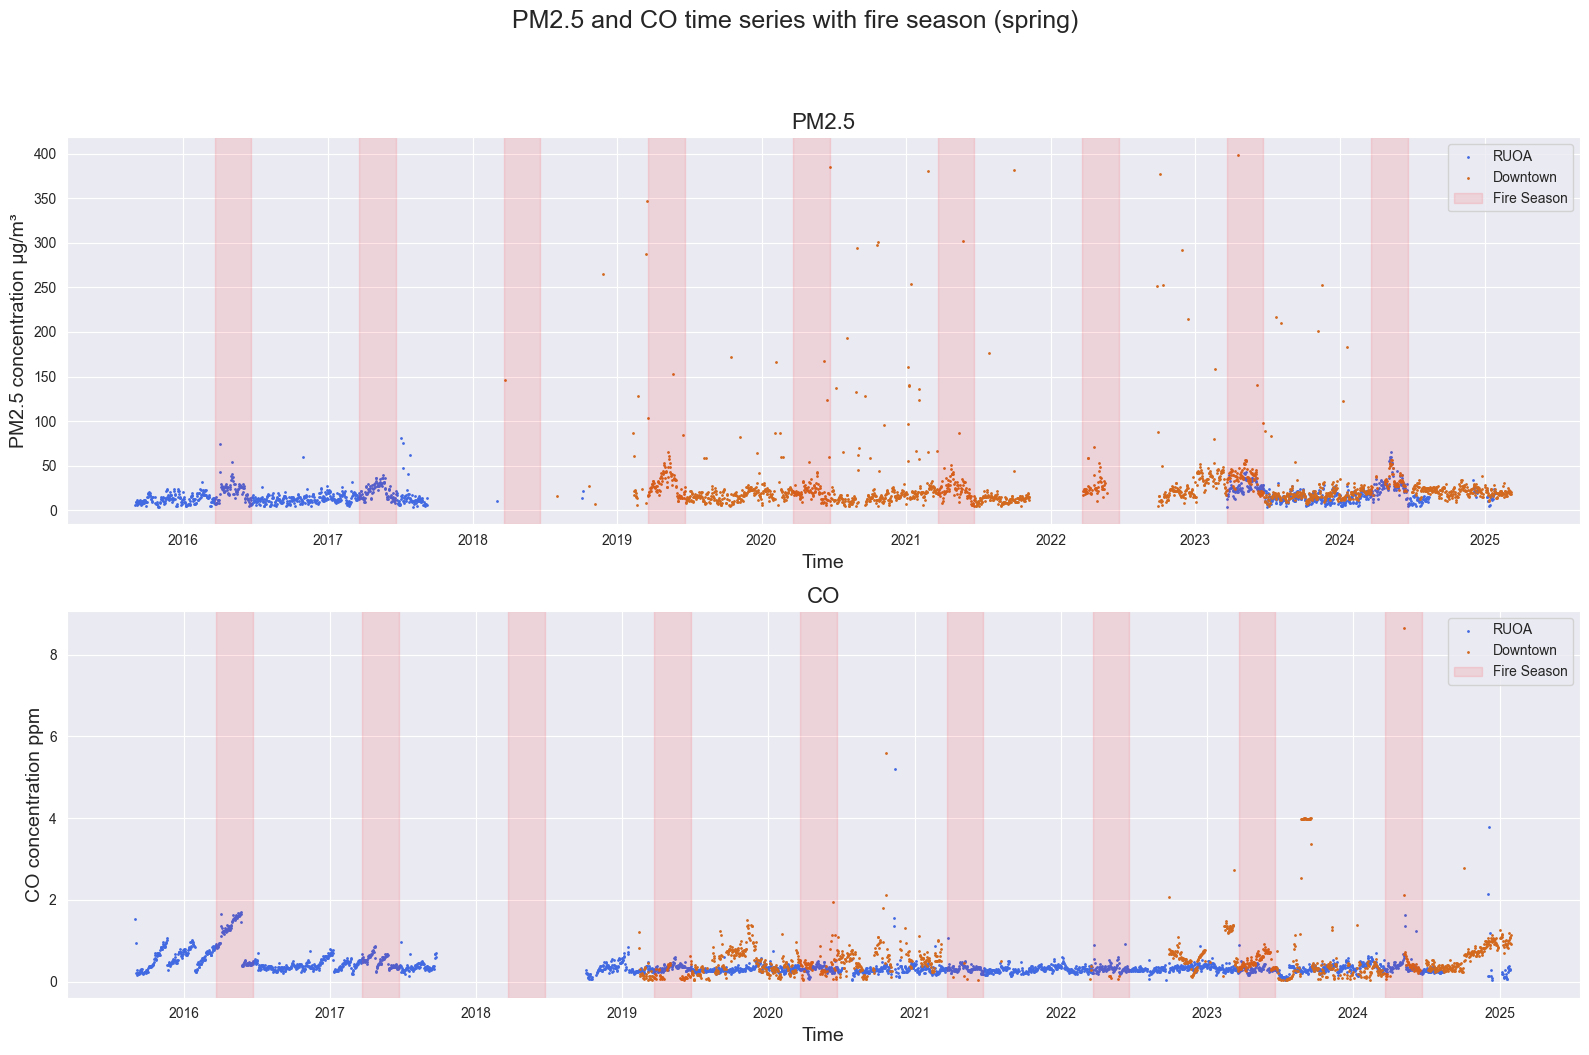

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

fig.suptitle("PM2.5 and CO time series with fire season (spring)", fontsize=18, y=1.05)

ax[0].scatter(df_merge["Time"], df_merge["PM2.5"], s=1, label="RUOA", color="royalblue")
ax[0].scatter(df_merge["Time"], df_merge["PM2.5Downtown"], s=1, label="Downtown", color="chocolate")
add_fire_shading(ax[0], df_merge["Time"], df_merge["Fire"])
ax[0].set_title("PM2.5", fontsize=16)
ax[0].set_xlabel("Time", fontsize=14)
ax[0].set_ylabel("PM2.5 concentration μg/m³", fontsize=14)
ax[0].legend()

ax[1].scatter(df_merge["Time"], df_merge["CO"], s=1, label="RUOA", color="royalblue")
ax[1].scatter(df_merge["Time"], df_merge["CODowntown"], s=1, label="Downtown", color="chocolate")
add_fire_shading(ax[1], df_merge["Time"], df_merge["Fire"])
ax[1].set_title("CO", fontsize=16)
ax[1].set_xlabel("Time", fontsize=14)
ax[1].set_ylabel("CO concentration ppm", fontsize=14)
ax[1].legend()

plt.tight_layout()
plt.show()


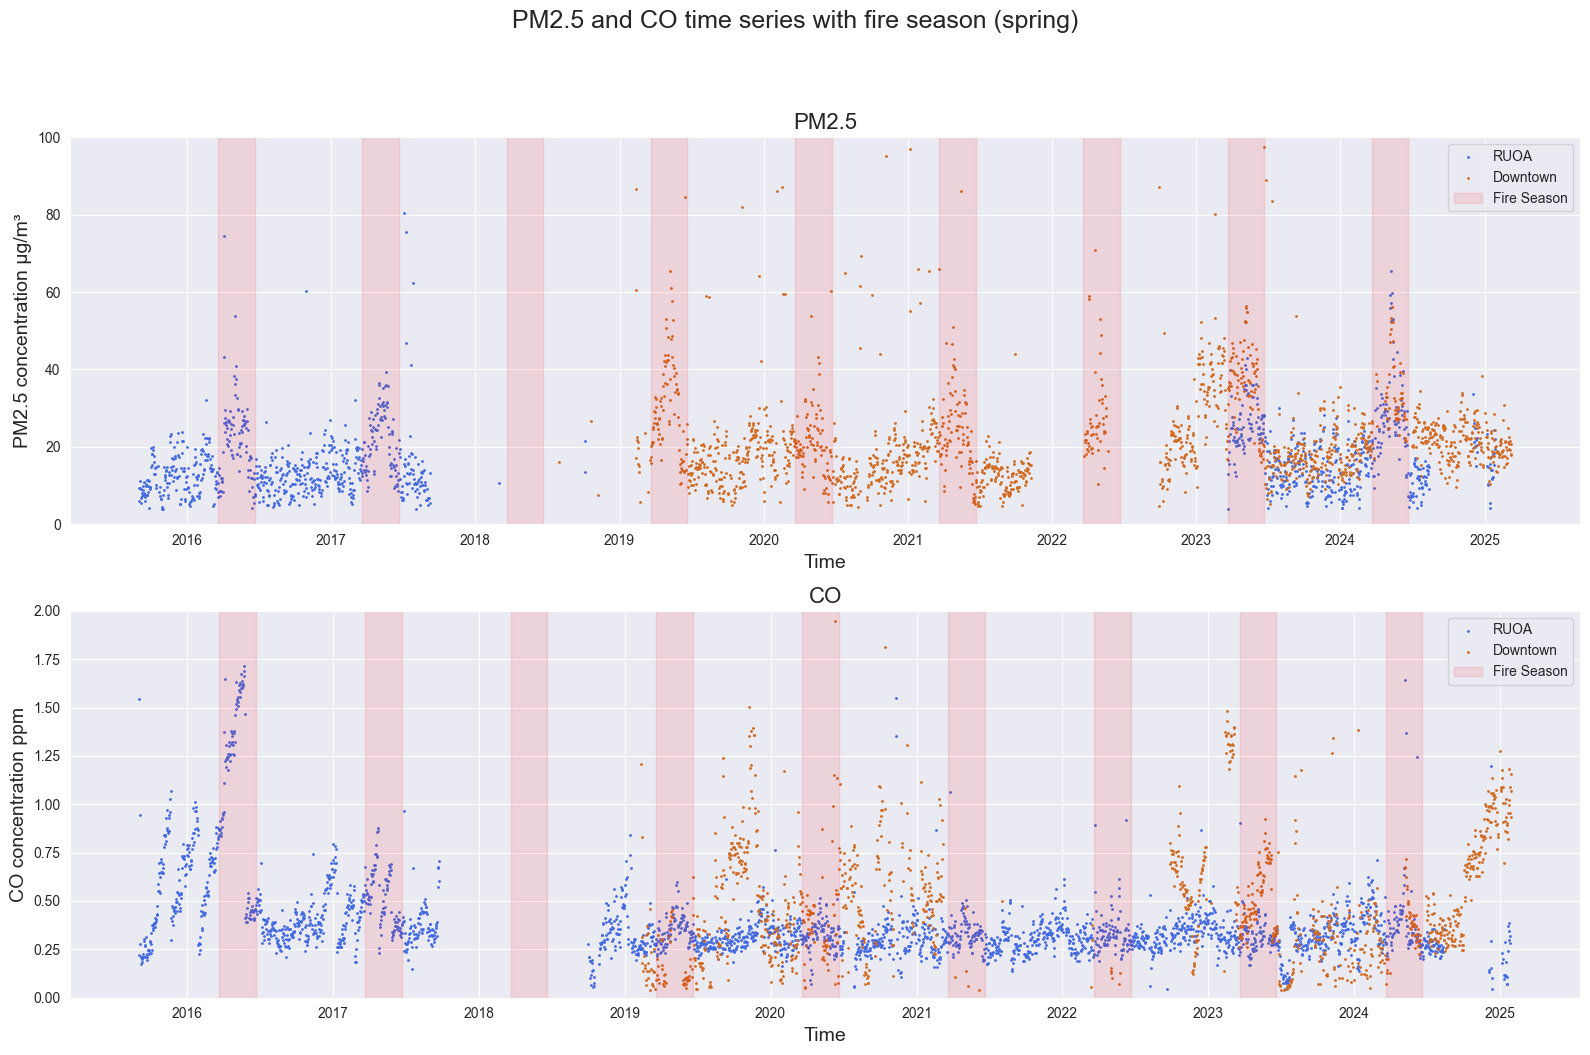

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

fig.suptitle("PM2.5 and CO time series with fire season (spring)", fontsize=18, y=1.05)

ax[0].scatter(df_merge["Time"], df_merge["PM2.5"], s=1, label="RUOA", color="royalblue")
ax[0].scatter(df_merge["Time"], df_merge["PM2.5Downtown"], s=1, label="Downtown", color="chocolate")
add_fire_shading(ax[0], df_merge["Time"], df_merge["Fire"])
ax[0].set_ylim(0, 100)
ax[0].set_title("PM2.5", fontsize=16)
ax[0].set_xlabel("Time", fontsize=14)
ax[0].set_ylabel("PM2.5 concentration μg/m³", fontsize=14)
ax[0].legend()

ax[1].scatter(df_merge["Time"], df_merge["CO"], s=1, label="RUOA", color="royalblue")
ax[1].scatter(df_merge["Time"], df_merge["CODowntown"], s=1, label="Downtown", color="chocolate")
add_fire_shading(ax[1], df_merge["Time"], df_merge["Fire"])
ax[1].set_ylim(0, 2)
ax[1].set_title("CO", fontsize=16)
ax[1].set_xlabel("Time", fontsize=14)
ax[1].set_ylabel("CO concentration ppm", fontsize=14)
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
df_merge["SolarRadiationDowntown"]

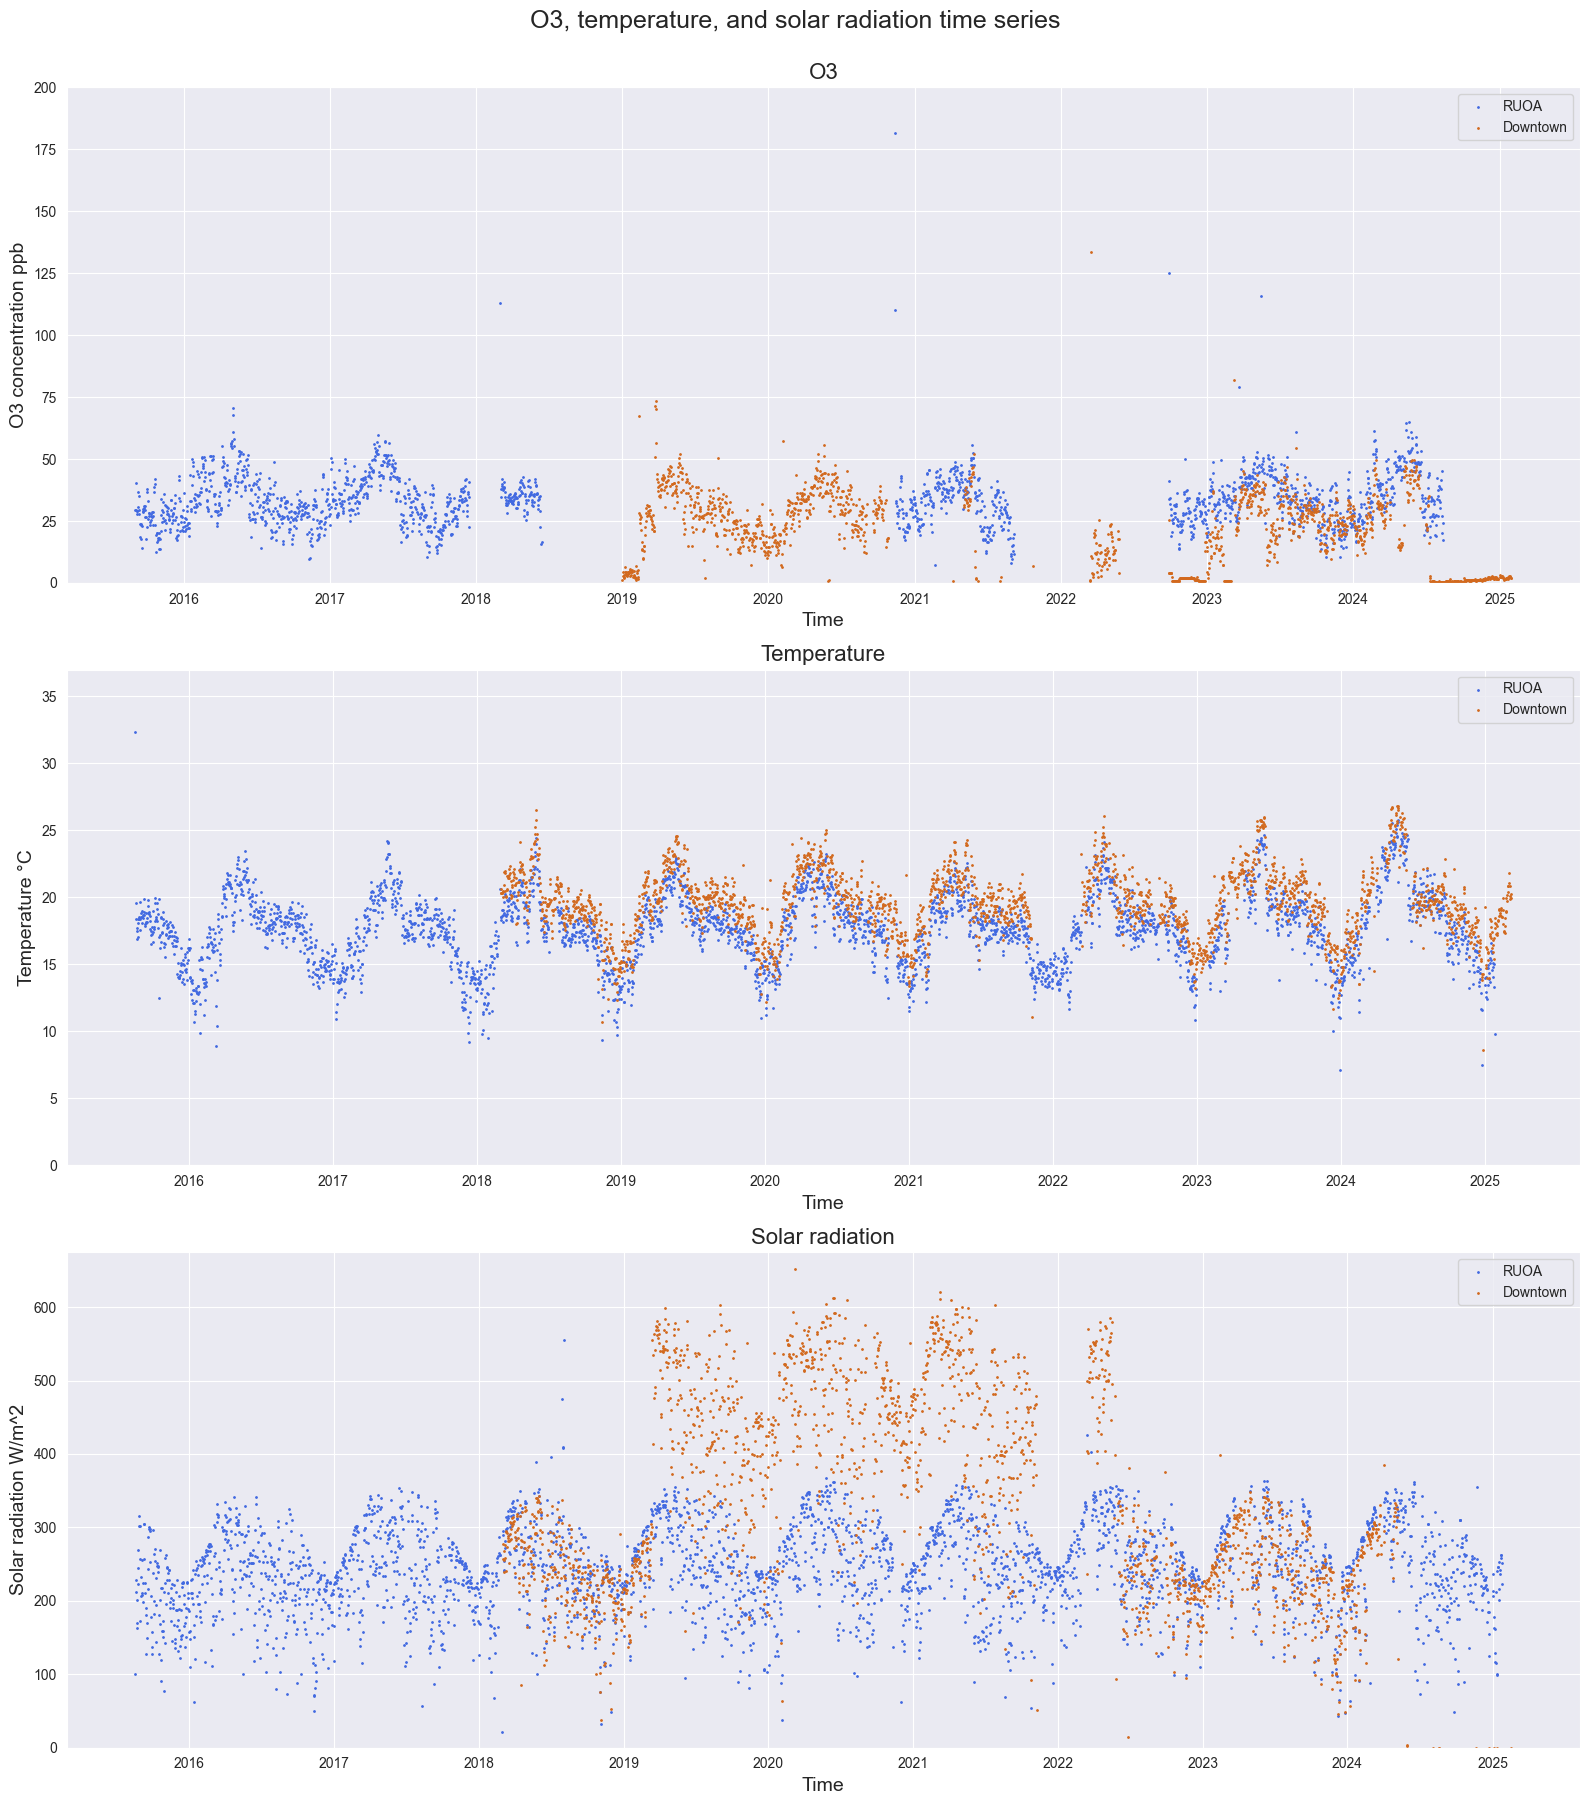

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

fig.suptitle("O3, temperature, and solar radiation time series", fontsize=18, y=1)

ax[0].scatter(df_merge["Time"], df_merge["O3"], s=1, label="RUOA", color="royalblue")
ax[0].scatter(df_merge["Time"], df_merge["O3Downtown"], s=1, label="Downtown", color="chocolate")
ax[0].set_ylim(0, 200)
ax[0].set_title("O3", fontsize=16)
ax[0].set_xlabel("Time", fontsize=14)
ax[0].set_ylabel("O3 concentration ppb", fontsize=14)
ax[0].legend()

ax[1].scatter(df_merge["Time"], df_merge["Temp_Avg"], s=1, label="RUOA", color="royalblue")
ax[1].scatter(df_merge["Time"], df_merge["TemperatureDowntown"], s=1, label="Downtown", color="chocolate")
ax[1].set_ylim(0, 37)
ax[1].set_title("Temperature", fontsize=16)
ax[1].set_xlabel("Time", fontsize=14)
ax[1].set_ylabel("Temperature °C", fontsize=14)
ax[1].legend()

ax[2].scatter(df_merge["Time"], df_merge["Rad_Avg"], s=1, label="RUOA", color="royalblue")
ax[2].scatter(df_merge["Time"], df_merge["SolarRadiationDowntown"], s=1, label="Downtown", color="chocolate")
ax[2].set_ylim(0, 675)
ax[2].set_title("Solar radiation", fontsize=16)
ax[2].set_xlabel("Time", fontsize=14)
ax[2].set_ylabel("Solar radiation W/m^2", fontsize=14)
ax[2].legend()

plt.tight_layout()
plt.show()


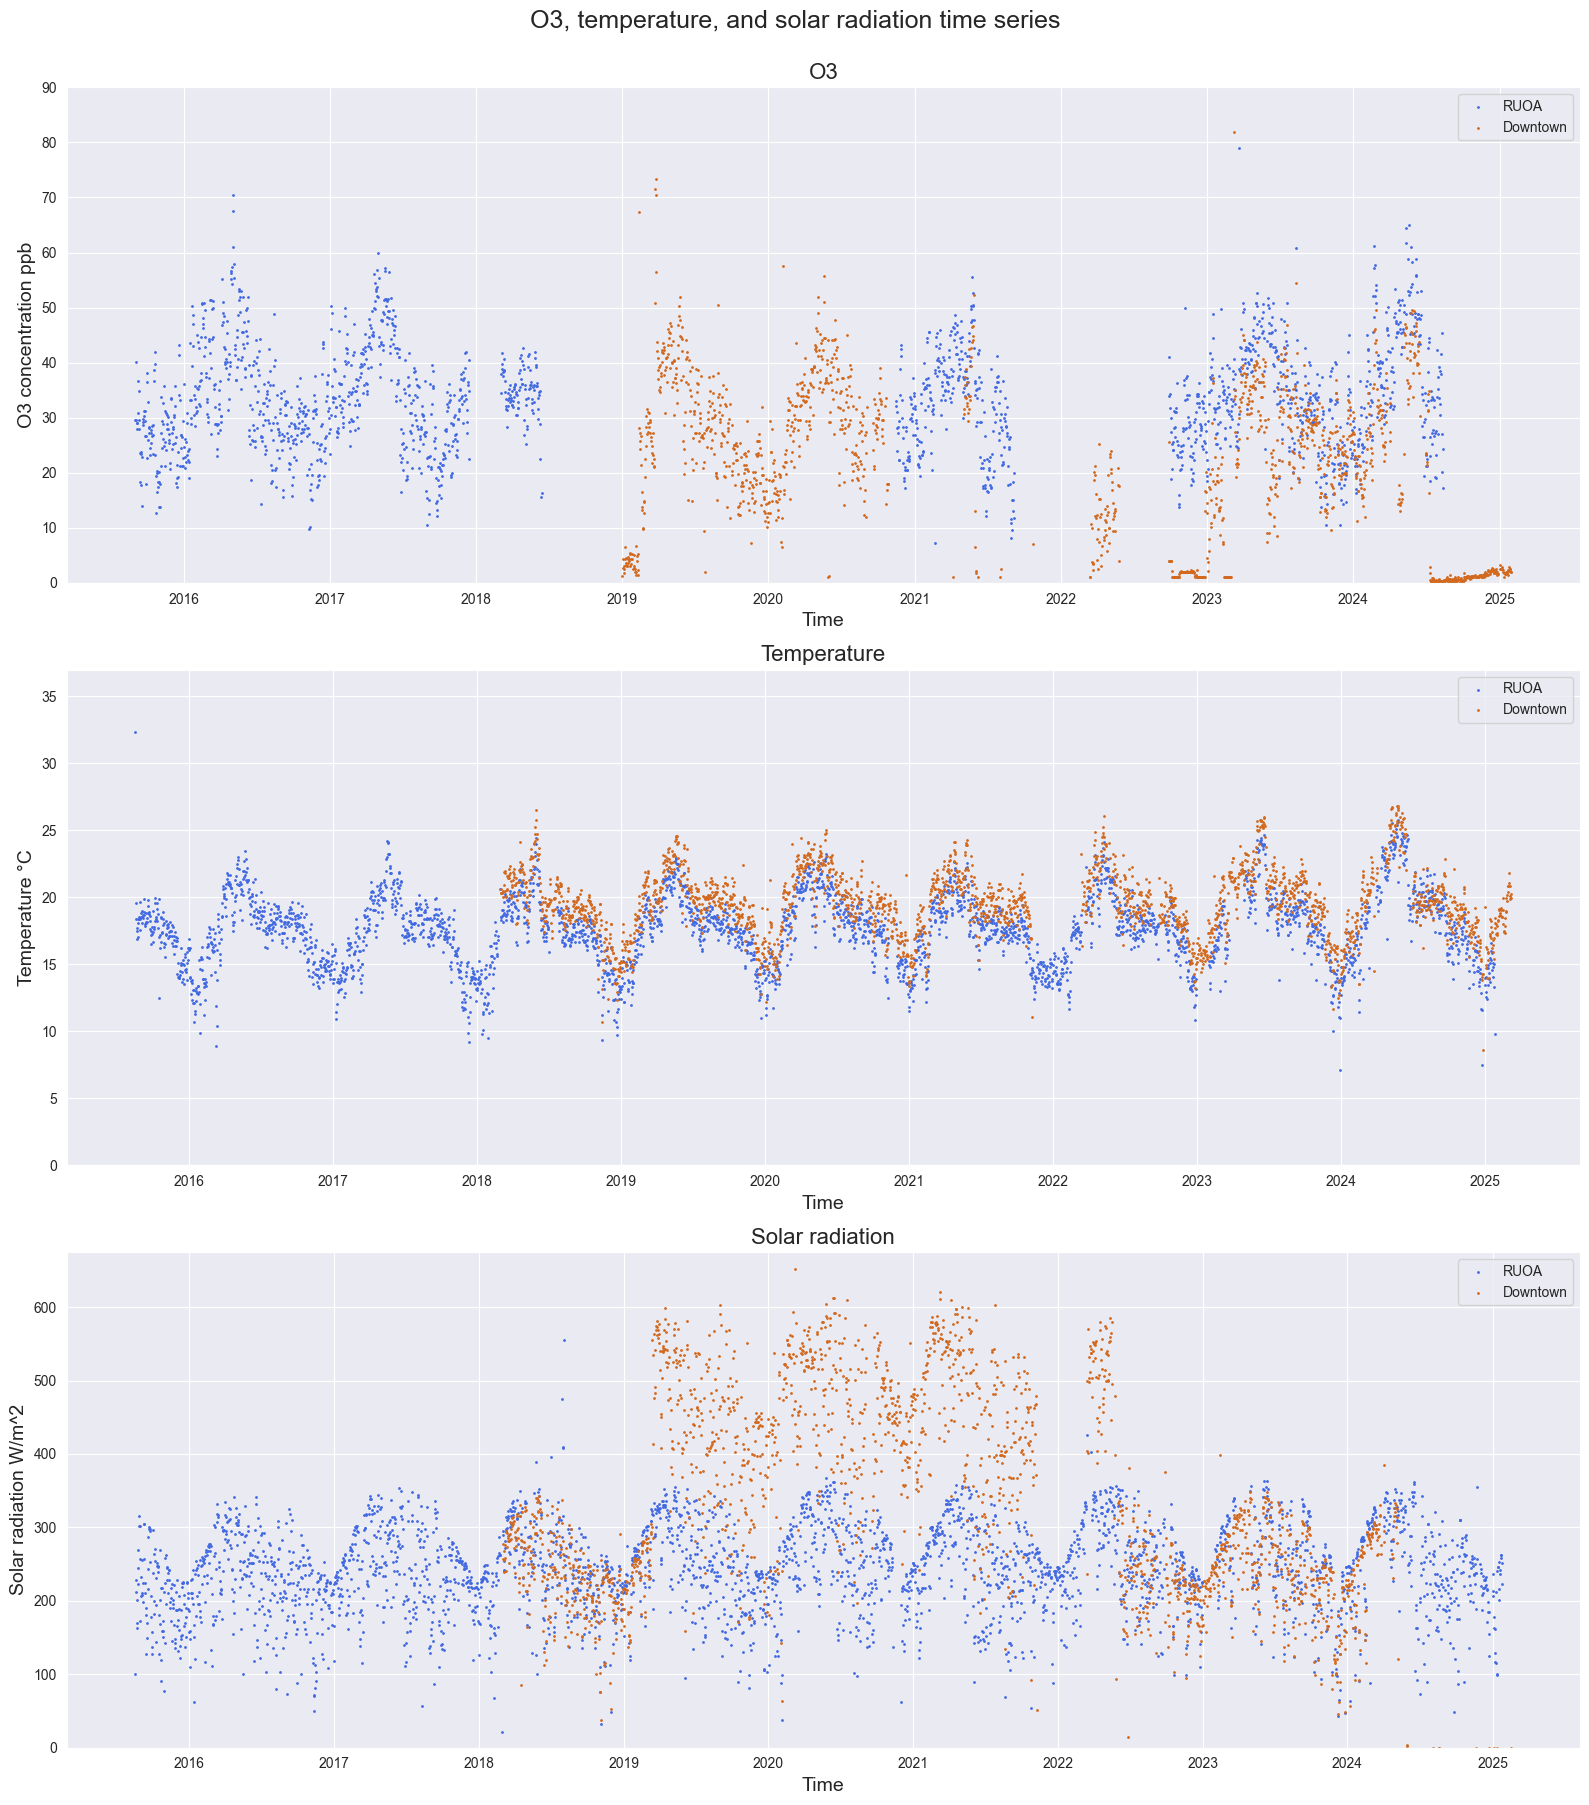

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

fig.suptitle("O3, temperature, and solar radiation time series", fontsize=18, y=1)

ax[0].scatter(df_merge["Time"], df_merge["O3"], s=1, label="RUOA", color="royalblue")
ax[0].scatter(df_merge["Time"], df_merge["O3Downtown"], s=1, label="Downtown", color="chocolate")
ax[0].set_ylim(0, 90)
ax[0].set_title("O3", fontsize=16)
ax[0].set_xlabel("Time", fontsize=14)
ax[0].set_ylabel("O3 concentration ppb", fontsize=14)
ax[0].legend()

ax[1].scatter(df_merge["Time"], df_merge["Temp_Avg"], s=1, label="RUOA", color="royalblue")
ax[1].scatter(df_merge["Time"], df_merge["TemperatureDowntown"], s=1, label="Downtown", color="chocolate")
ax[1].set_ylim(0, 37)
ax[1].set_title("Temperature", fontsize=16)
ax[1].set_xlabel("Time", fontsize=14)
ax[1].set_ylabel("Temperature °C", fontsize=14)
ax[1].legend()

ax[2].scatter(df_merge["Time"], df_merge["Rad_Avg"], s=1, label="RUOA", color="royalblue")
ax[2].scatter(df_merge["Time"], df_merge["SolarRadiationDowntown"], s=1, label="Downtown", color="chocolate")
ax[2].set_ylim(0, 675)
ax[2].set_title("Solar radiation", fontsize=16)
ax[2].set_xlabel("Time", fontsize=14)
ax[2].set_ylabel("Solar radiation W/m^2", fontsize=14)
ax[2].legend()

plt.tight_layout()
plt.show()
